# User Satisfaction Analysis

In [1]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '2'
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from script.connection import Connector

In [3]:
connector=Connector()

In [4]:
xdr_data=connector.load_table_to_dataframe('xdr_data_cleaned')

SQLAlchemy connection is disposed


In [5]:
from script.user_satisfaction_analyzer import SatisfactionAnalyzer

In [6]:
analyzer=SatisfactionAnalyzer()

### Assigning engagement and experience scores

In [7]:
user_aggregate=analyzer.user_aggregate(xdr_data)

In [8]:
analyzer.kmeans_clustering(user_aggregate)

In [9]:
analyzer.calculate_engagement_experience_scores(user_aggregate)

Low-engaged centroid: [3.32062675e+06 4.35781894e+01 7.89835146e+02]
Worst-experience centroid: [3.32062675e+06 4.35781894e+01 7.89835146e+02]


,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Average TCP Retrans. Vol (Bytes),Avg Bearer TP (kbps),Avg RTT (ms),Cluster,Engagement Score,Experience Score
0,3.360100e+10,7.149236e+06,259619.136881,37.0,39.0000,46.000000,0.000000,Huawei P20 Lite Huawei Nova 3E,3.704428e+06,38.0000,23.000000,0,-0.995786,-0.995786
1,3.360100e+10,7.149236e+06,259619.136881,48.0,51.0000,30.000000,1.000000,Apple iPhone 7 (A1778),3.704428e+06,49.5000,15.500000,0,-0.995786,-0.995786
2,3.360100e+10,7.149236e+06,259619.136881,48.0,49.0000,78.317083,12.866779,undefined,3.704428e+06,48.5000,45.591931,0,-0.995786,-0.995786
3,3.360101e+10,1.066000e+03,259619.136881,204.0,44.0000,69.000000,15.000000,Apple iPhone 5S (A1457),1.303426e+05,124.0000,42.000000,0,-0.964786,-0.964786
4,3.360101e+10,8.249433e+06,140410.568441,20197.5,586.5232,57.000000,2.500000,Apple iPhone Se (A1723),4.194922e+06,10392.0116,29.750000,2,-0.990368,-0.990368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106466,3.379000e+10,2.150440e+05,3001.000000,9978.0,387.0000,42.000000,10.000000,Huawei Honor 9 Lite,1.090225e+05,5182.5000,26.000000,0,-0.964550,-0.964550
106467,3.379000e+10,7.149236e+06,259619.136881,68.0,48.0000,34.000000,6.000000,Apple iPhone 8 Plus (A1897),3.704428e+06,58.0000,20.000000,0,-0.995786,-0.995786
106468,3.197021e+12,7.149236e+06,259619.136881,1.0,0.0000,78.317083,12.866779,Quectel Wireless. Quectel Ec25-E,3.704428e+06,0.5000,45.591931,0,-0.995786,-0.995786
106469,3.370000e+14,7.149236e+06,259619.136881,11.0,22.0000,78.317083,12.866779,Huawei B525S-23A,3.704428e+06,16.5000,45.591931,0,-0.995786,-0.995786


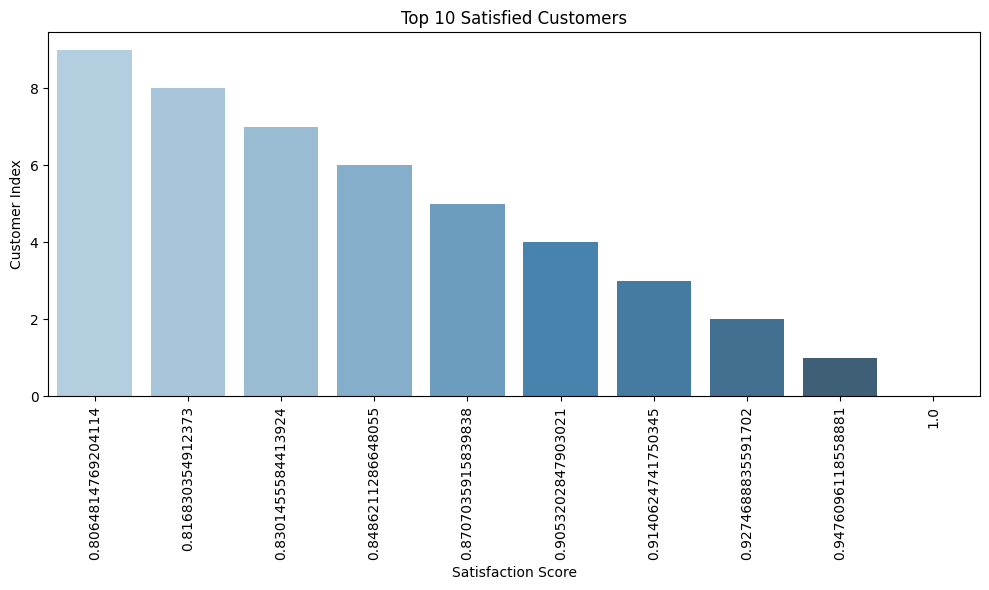

In [10]:
analyzer.calculate_satisfaction_scores(user_aggregate)

###  Regression model to predict satisfaction score

In [11]:
analyzer.regression_model(user_aggregate)

LinearRegression()

### K-Means clustering on engagement and experience scores

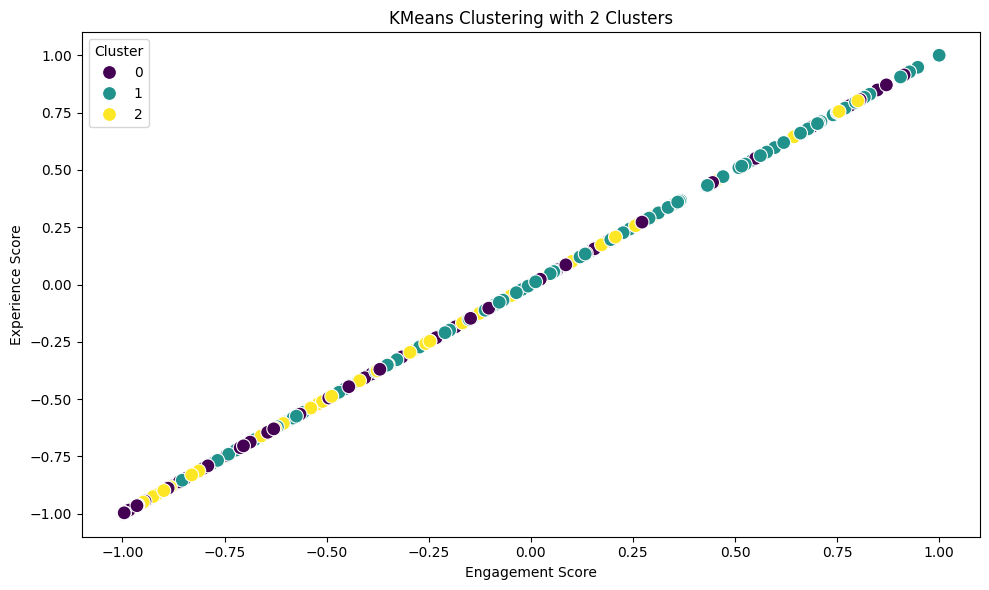

In [12]:
analyzer.kmeans_on_engagement_experience(user_aggregate)

### Aggregate satisfaction and experience per cluster

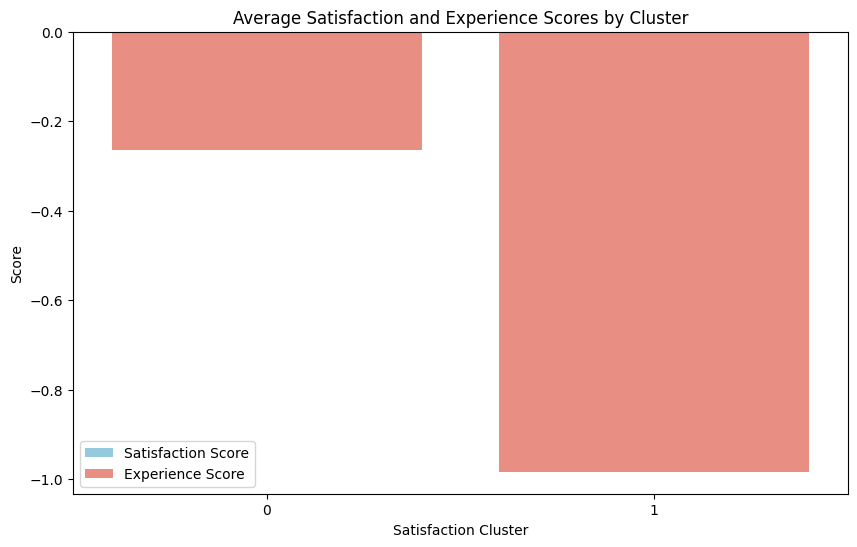

In [13]:
analyzer.aggregate_cluster_scores(user_aggregate)

### Exporting to PostgrSQL

In [14]:
connector.add_dataframe_to_table(user_aggregate[['MSISDN/Number', 'Engagement Score', 'Experience Score', 'Satisfaction Score']],'engagement_experience_&_satisfaction scores')

DataFrame successfully added to table 'engagement_experience_&_satisfaction scores' in the database.
SQLAlchemy engine is disposed.


### Model deployment and tracking